# GlobalAveragePooling (GAP)
- Feature map의 채널별로 평균값을 추출 1 x 1 x channel 의 Feature map을 생성
- `model.add(keras.layers.GlobalAveragePooling2D())`
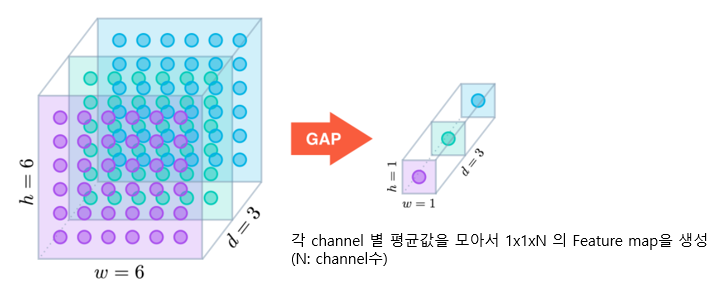

- Feature Extraction layer에서 추출한 Feature map을 Classifier layer로 Flatten해서 전달하면 많은 연결노드와 파라미터가 필요하게됨
- GAP를 사용하면 노드와 파라미터의 개수를 효과적으로 줄일 수 있음
- Feature map의 채널수가 많을 경우, GAP를 사용하는 것이 효과적이나 채널수가 적다면 Flatten 사용하는 것이 좋음
    - 일반적으로, Average Pooling은 MaxPooling 보다 성능 떨어짐
    - 채널이 512개 이상일 경우, Average Pooling도 좋은 성능 낼 수 있음
 (참고) Depth, Wide
 - Depth 깊게/얖게 한다? Layer 많이 쌓는 것
 - Wide하게 만든다? 채널 수와 관련. 채널을 더 많이 쌓는 것
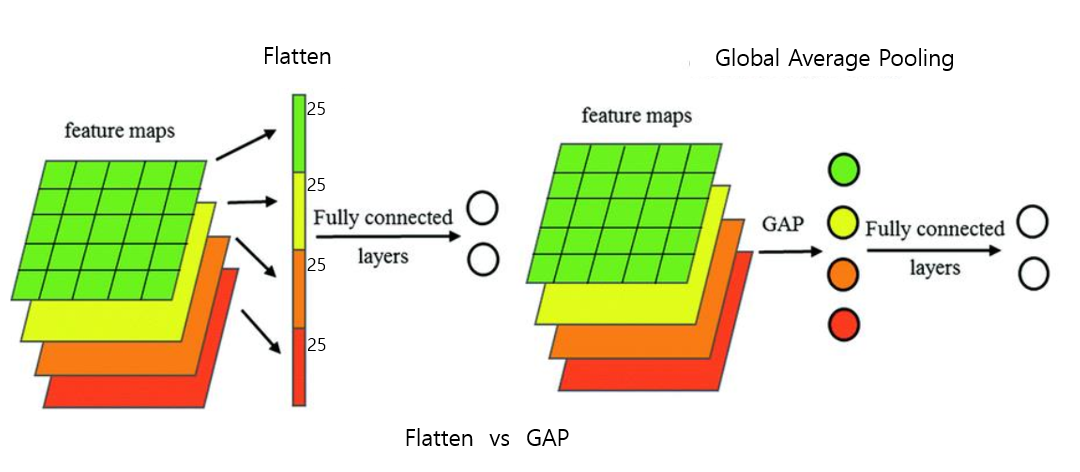

In [ ]:
# 이미지 다운로드
import gdown
url = 'https://drive.google.com/uc?id=1nBE3N2cXQGwD8JaD0JZ2LmFD-n3D5hVU'
fname = 'cats_and_dogs_small.zip'
gdown.download(url, fname, quiet=False)

In [ ]:
!mkdir data

In [ ]:
## 압축 풀기
!unzip -q ./cats_and_dogs_small.zip -d data/cats_and_dogs_small

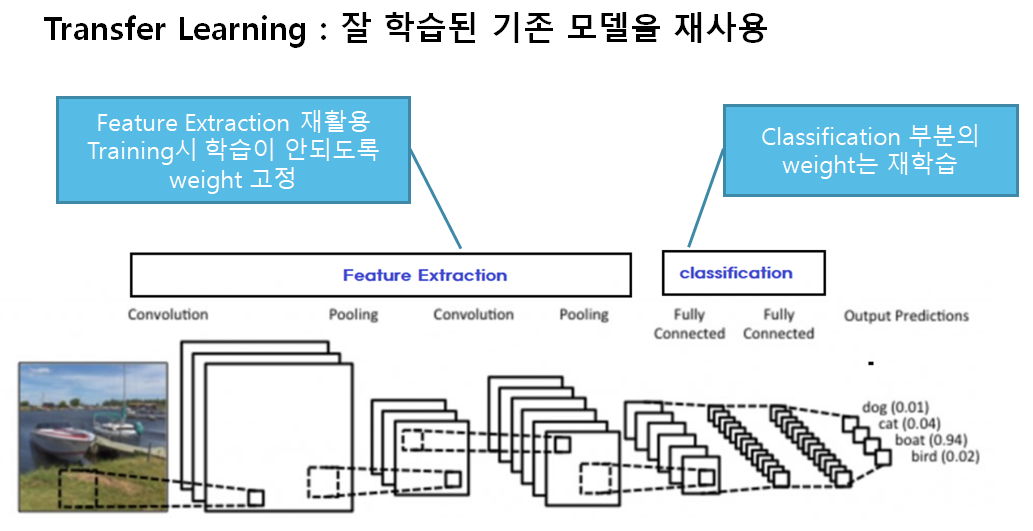

## Transfer learning (전이학습)
- 큰 데이터 셋을 이용해 미리 학습된 pre-trained Model의 Weight를 사용하여 현재 하려는 예측 문제에 활용
- ### Convolution base(Feature Extraction 부분)만 활용
    - Convolution base는 이미지에 나타나는 일반적인 특성을 파악하기 위한 부분이므로 재사용 가능(Bottom 쪽)
    - Classifier 부분은 학습하려는 데이터셋의 class들에 맞게 변경해야 하므로 재사용 불가능
- Pretrained Convolution layer의 활용 
    - Feature extraction
        - 학습시 학습되지 않고 Feature를 추출하는 역할만 함
    - Fine tuning
        - 학습시 Pretrained Covolution layer도 같이 학습해서 내 데이터셋에 맞춤

## Feature extraction
- 기존의 학습된 network에서 fully connected layer를 제외한 나머지 weight를 고정하고 새로운 목적에 맞는 fully connected layer를 추가하여 추가된 weight만 학습하는 방법
- `tensorflow.keras.applications` module이 지원하는  image classification models
    - (https://www.tensorflow.org/api_docs/python/tf/keras/applications)    
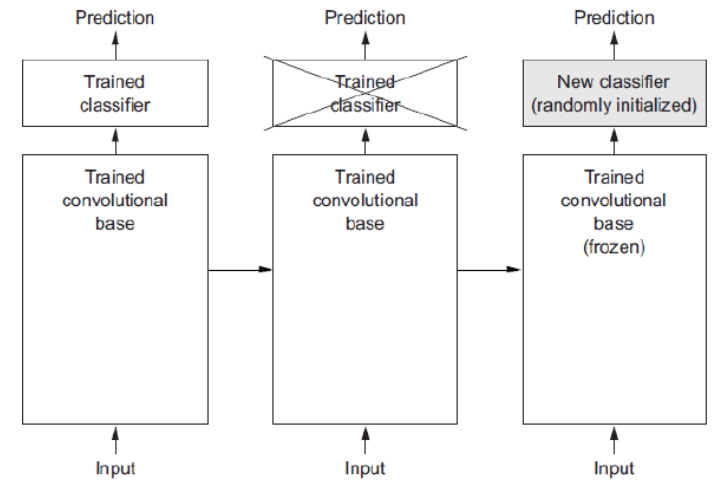





> ### ImageNet
>    - 웹상에서 수집한 약 1500만장의 라벨링된 고해상도 이미지로 약 22,000개 카테고리로 구성됨

> ### ILSVRC(ImageNet Large Scale Visual Recognition Challenge) 대회
>   - 2010년부터 2017년까지 진행된 컴퓨터 비전 경진대회
>   - ImageNet의 이미지중 **1000개 카테고리 약 120만장의 학습용이미지, 5만장의 검증 이미지, 15만장의 테스트 이미지를** 이용해 대회를 진행
>   - **2012년** CNN기반 딥러닝 알고리즘인 **AlexNet**이 2위와 큰 차이로 우승하며 이후 딥러닝 알고리즘이 대세가 됨. 특히 2015년 우승한 ResNet은 0.036의 에러율을 보이며 우승했는데 이는 사람의 에러율이라 알려진 0.05 보다 높은 정확도였음
>   - ILSVRC에서 우승하거나 좋은 성적을 올린 모델들이 컴퓨터 비전분야 발전에 큰 역할을 해왔으며 이후 다양한 딥러닝 모델의 백본(backbone)으로 사용되고 있음

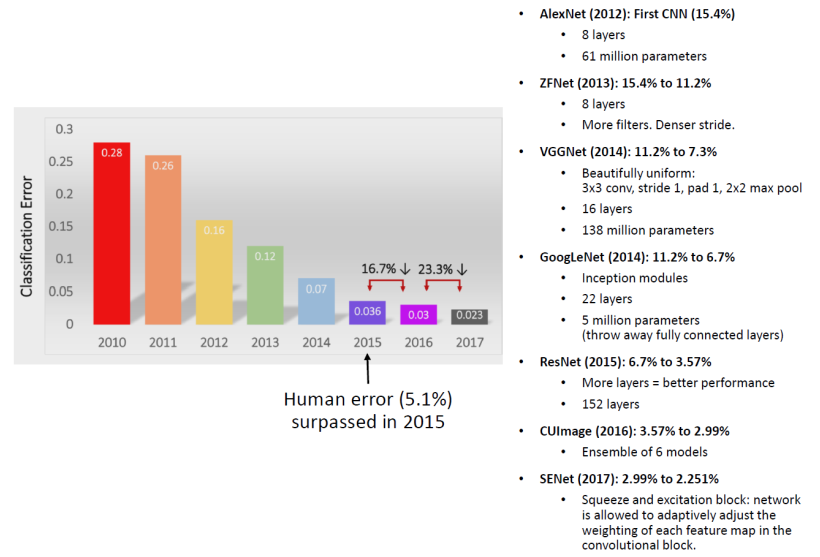

##  VGG16 모델
- ImageNet ILSVRC Challenge 2014에서 2등한 모델로 Simonyan and Zisserman(Oxford Univ.)에 의해 제안
    - VGGNet이 준우승을 하긴 했지만, 구조의 간결함과 사용의 편이성으로 인해 1등한 GoogLeNet보다 더 각광받음
- 단순한 구조로 지금까지 많이 사용됨
- 총 16개 layer로 구성
- 네트워크 깊이가 어떤 영향을 주는지 연구하기 위해 설계된 네트워크 -> 동일한 kernel size에 convolution의 개수를 늘리는 방식으로 구성됨    
- 11 layer, 13 layer, 16 layer, 19 layer의 네트워크를 테스트 
    - 19 layer의 성능이 16 layer보다 크게 나아지지 않음
- Filter의 수가 64, 128, 256, 512 두 배씩 커짐 
- 항상 $3 \times 3$ filter, Stride=1, same padding, $2\times 2$ MaxPooling 사용
    - 이전 AlexNet이 5 X 5 필터를 사용했는데 VGG16은 3 X 3 필터 2개를 쌓아 사용
        - 3 x 3 필터 2개를 쌓는 것이 5 x 5  하나 사용하는 것보다 더 적은 파라미터를 사용하며 성능이 더 좋았음
    - Feature map의 사이즈를 convolution layer가 아닌 Max Pooling 을 사용해 줄여줌.
- VGG16의 단점? 마지막 분류를 위해 Fully Connected Layer 3개를 붙여 파라미터 수가 너무 많아짐. 약 1억4천만 개의 parameter(가중치)중 1억 2천만개 정도가 Fully Connected Layer의 파라미터
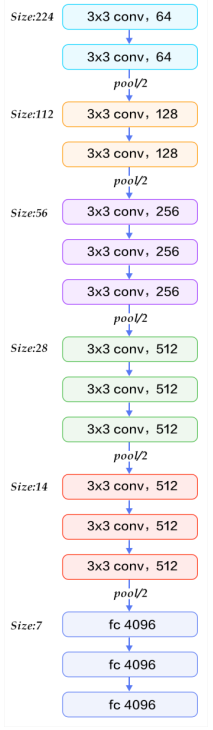

## ResNet (Residual Networks)
- 이전 모델들과 비교해 shortcut connection기법을 이용해 Layer수를 획기적으로 늘린 CNN 모델로 ILSVRC 2015년 대회에서 우승을 차지함

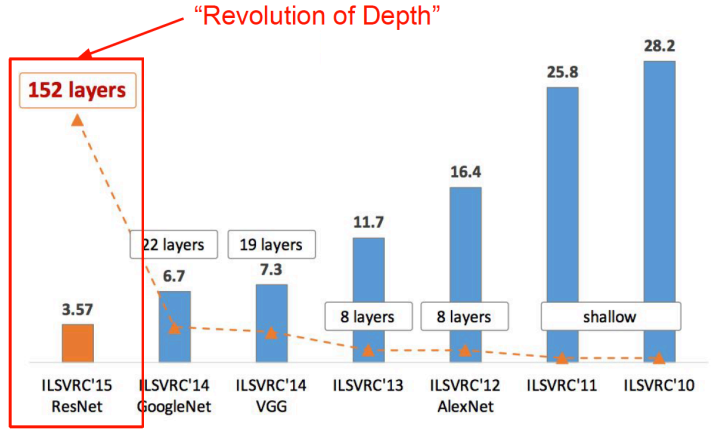

- 레이어를 깊게 쌓으면 성능이 더 좋아 지지 않을까? 실제는 Test 셋 뿐만 아니라 Train Set에서도 성능이 나쁘게 나옴
- Train set에서도 성능이 나쁘게 나온 것은 최적화 문제로 보고, 레이어를 깊게 쌓으면 최적화 하기가 어렵다고 생각 
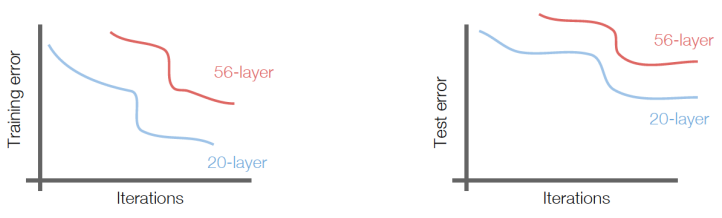

### Idea
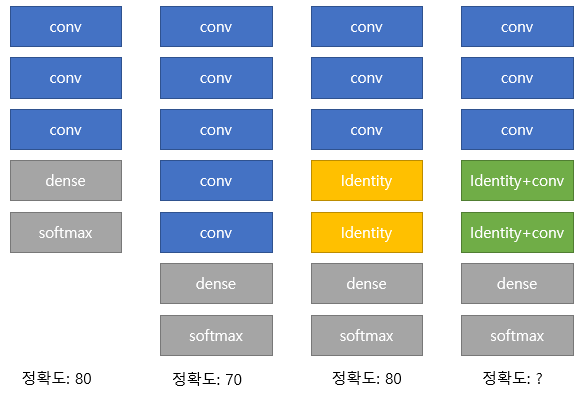

- 입력값을 그대로 출력하는 identity block을 사용하면 성능이 떨어지지는 않음
- 그럼 Convoloution block을 identity block으로 만들면 최소한 성능은 떨어지지 않고 깊은 Layer를 쌓을 수 있지 않을까?

### Solution
- Residual block(Shortcut, Skip Connection)
    - block: 같은 패턴으로 쌓여 있는 Layer들(Conv2d-Conv2d-MaxPool/...)
    - Feature map + 입력값의 형태
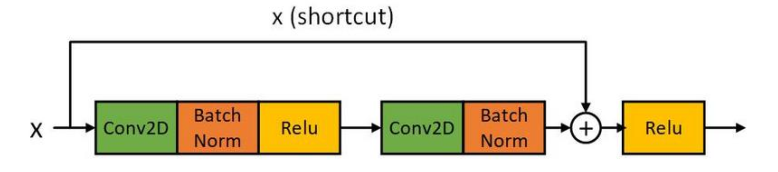

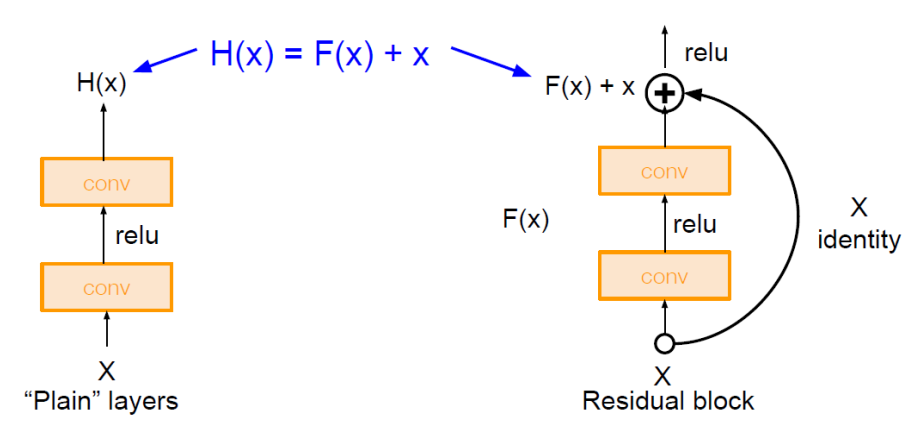

- 기존 Layer들의 목표? 입력값인 X를 출력값인 Y로 최적의 매핑할 수 있는 함수 H(X) 찾는 것. 그래서 H(X) – Y 가 최소값이 되는 방향으로 학습 진행하면서 H(X) 찾음. 그런데 레이어가 깊어지면서 최적화에 어려움으로 성능이 떨어지는 문제 발생

- ResNet은 layer를 통과해서 나온 값이 **입력값과 동일하게 만드는 것을 목표로 하는 Identity block** 구성
- Identity block은 입력값 X를 레이어를 통과시켜서 나온 Y에 입력값 X를 더해서 합치도록 구성

$$\large H(x) = F(x) + x\\x: input,\;H(x): output,\;F(x): layer통과값$$ 
 
 
- 목표는 $H(x)$(레이어 통과한 값)가 input인 x와 동일한 것이므로 F(x)를 0으로 만들기 위해 학습
- $F(x)$는 **잔차(Residual)**가 됨. 그리고 잔차인 $F(x)$가 0이 되도록 학습하는 방식이므로 Residual Learning이라고 함
- 입력인 x를 직접 전달하는 것을 **shortcut connection** 또는 **identity mapping** 또는 **skip connection** 이라고 함
    - 이 shortcut은 파라미터 없이 단순히 값을 더하는 구조이므로 연산량에 크게 영향 없음
- 그리고 Residual을 찾는 레이어를 **Residual Block, Identity Block**이라고 함     

### 성능향상
- $H(x) = F(x) + x$을 $x$에 대해 미분하면 최소한 1이므로 Gradient Vanishing 문제를 극복
- 잔차학습이라고 하지만 Residual block 은 Convolution Layer와 Activation Layer로 구성되어 있기 때문에, 이 Layer를 통과한 Input으로부터 Feature map을 추출하는 과정은 진행되며 레이어가 깊으므로 다양한 더욱 풍부한 특성들을 추출하게 되어 성능이 향상됨

### ResNet 구조
- Residual block들을 쌓는 구조
    - 일반 Convolution Layer(backbone)을 먼저 쌓고 Identity(Residual) block들을 계속 쌓음
- 모든 Identity block은 두개의 3X3 conv layer로 구성됨
- 일정 레이어 수별로 filter의 개수를 2배로 증가시키며 stride를 2로 하여 downsampling 함(Pooling Layer는 Identity block의 시작과 마지막에만 적용)
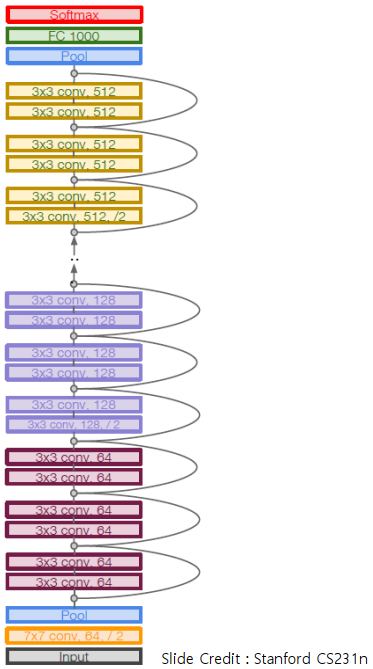

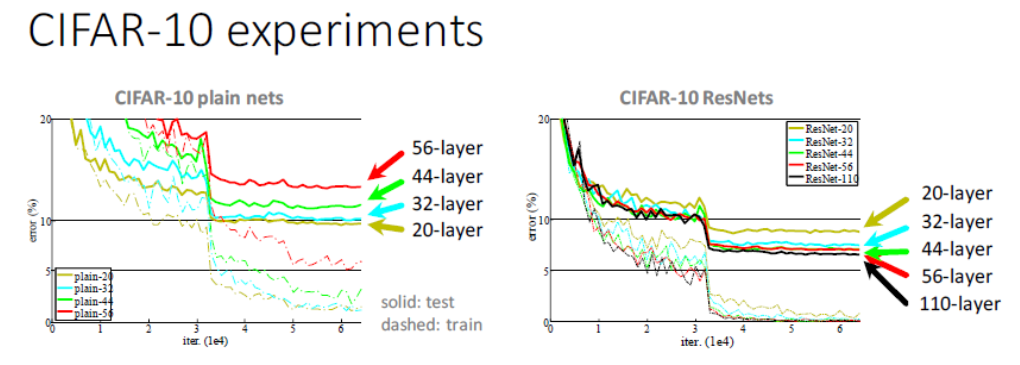

## Pretrained Model 사용
- tensorflow.keras.applications 패키지를 통해 제공
- 모델이름이 클래스이름
    - VGG16, ResNet152 등등
- 생성자 매개변수
    - `weights`: 모형의 학습된 weight. 기본값- 'imagenet'
    - `include_top`: fully connected layer를 포함할지 여부. True 포함시킴, False: 포함 안 시킴
    - `input_shape`: 사용자가 입력할 이미지의 크기 shape. 3D 텐서로 지정. (높이, 너비, 채널). 기본값: (224,224, 3)

## Feature extraction의 두 가지 방법
1. **빠른 추출방식**
    - 예측하려는 새로운 데이터를 위의 `conv_base`에 입력하여 나온 출력값을 numpy 배열로 저장하고 이를 분류 모델의 입력값으로 사용. Convolution operation을 하지 않아도 되기 때문에 빠르게 학습. 하지만 data augmentation 방법을 사용할 수 없음.

2. **받아온 특성 Layer를 이용해 새로운 모델 구현하는 방식**
    - 위의 `conv_base` 이후에 새로운 layer를 쌓아 확장한 뒤 전체 모델을 다시 학습. 모든 데이터가 convolution layer들을 통과해야 하기 때문에 학습이 느림. 단 conv_base의 가중치는 업데이트 되지 않도록 한다. data augmentation 방법을 사용할 수 있음.

### 빠른 특성 추출 방식


- `conv_base`의 predict 메소드로 입력 이미지의 feature를 추출 

### Pretrained Network를 이용해 새로운 모델 구현하는 방식

- Conv_base의 feature extraction 부분에 fully connected layer를 추가하여 모형 생성 
- Conv_base에서 가져온 부분은 학습을 하지 않고 weight를 고정
    -  **Layer.trainable=False**

## 미세조정(Fine-tuning)
- Pretrained 모델을 내가 학습시켜야 하는 데이터셋(Custom Dataset)에 재학습시키는 것을 fine tunning 이라고 한다.
- 주어진 문제에 더 적합하도록 모델의 가중치들을 조정.

### Fine tuning 전략
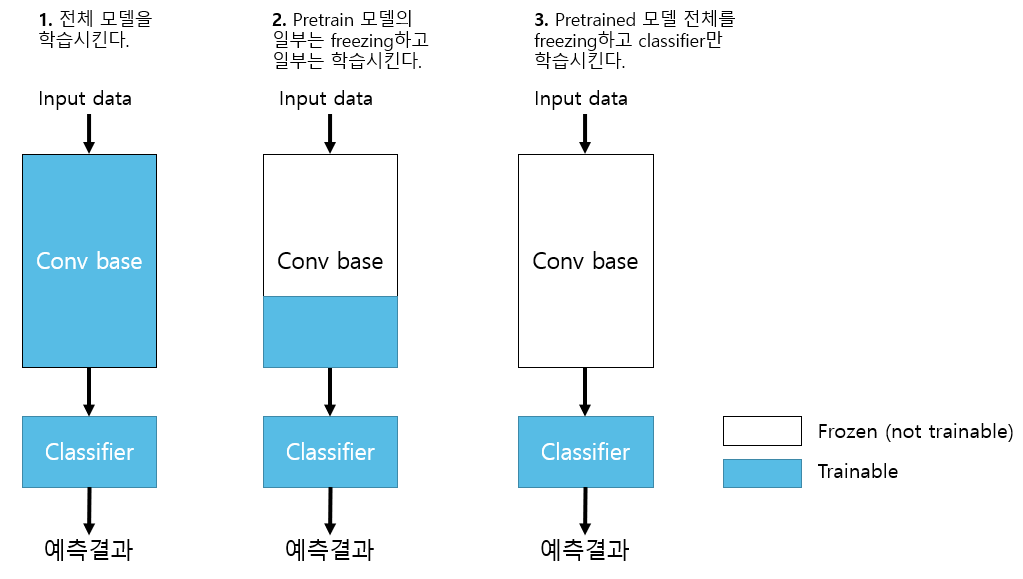

- **세 전략 모두 classifier layer들은 train한다.**

1. <span style="font-size:1.2em;font-weight:bold">전체 모델을 전부 학습시킨다.(1번)</span>
    - Pretrained 모델의 weight는 Feature extraction 의 초기 weight 역할을 한다.
    - **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **낮은 경우** 적용.
    - 학습에 시간이 많이 걸린다.
2. <span style="font-size:1.2em;font-weight:bold">Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습시킨다.(2번)</span>
    - **Train dataset의 양이 많고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
    - **Train dataset의 양이 적고** Pretained 모델이 학습했던 dataset과 custom dataset의 class간의 유사성이 **낮은 경우** 적용
3. <span style="font-size:1.2em;font-weight:bold">Pretrained 모델 전체를 고정시키고 classifier layer들만 학습시킨다.(3번)</span>
    - **Train dataset의 양이 적고** Pretrained 모델이 학습했던 dataset과 Custom dataset의 class간의 유사성이 **높은 경우** 적용.
  
  
> custom dataset: 내가 학습시키고자 하는 dataset 

### Pretrained 모델 Bottom layer들(Input과 가까운 Layer들)은 고정시키고 Top layer의 일부를 재학습

- Conv_base에서 가장 Top부분에 있는 레이어에 대해 fine-tuning.
    - 앞의 layer들은 비교적 일반적이고 재사용 가능한 feature를 학습
    - 너무 많은 parameter를 학습시키면 overfitting의 위험이 있음 (특히 새로운 데이터의 수가 적을 때)